<h1><center>Import Libraries & Data</center></h1>

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats
import math
import xgboost as xgb
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
from sklearn.metrics import mean_squared_error

In [310]:
health = pd.read_excel("final_data/health_final.xlsx", index_col = 0)
health.head()

,State,Date,Group,Subgroup,Pct_Anxiety,Pct_Depression,Pct_Anxiety_Or_Depression
0,United States,2020-04-29,By Age,18 - 29 years,40.2,32.7,46.8
1,United States,2020-05-09,By Age,18 - 29 years,42.0,36.2,47.4
2,United States,2020-05-16,By Age,18 - 29 years,38.6,36.7,47.7
3,United States,2020-05-23,By Age,18 - 29 years,39.1,36.7,46.6
4,United States,2020-05-30,By Age,18 - 29 years,42.2,36.8,49.3


In [311]:
fulldata = pd.read_excel("final_data/fulldata_final.xlsx", index_col = 0)
fulldata.head()

,State,Postcode,Fips,Date,Pct_Anxiety,Pct_Depression,Pct_Anxiety_Or_Depression,New_Cases,New_Deaths,Cum_Cases,Cum_Deaths,Pct_Infection,Pct_Mortality,Gdp_Change,Income_Change,Adjusted_Income_Change,Farm_Income_Change,Nonfarm_Income_Change,Pct_Unemployed,Population
0,Alabama,AL,1000.0,2020-04,25.600,18.600000,30.300,6069,258,6069,258,0.120797,0.005135,-29.5,8.6,8.7,9.3,(NM),13.7,5024115.0
1,Alabama,AL,1000.0,2020-05,26.175,22.850000,30.525,10884,358,10884,358,0.216635,0.007126,-29.5,8.6,8.7,9.3,(NM),10.4,5024115.0
2,Alabama,AL,1000.0,2020-06,32.500,27.100000,37.225,20093,320,20093,320,0.399931,0.006369,-29.5,8.6,8.7,9.3,(NM),8.7,5024115.0
3,Alabama,AL,1000.0,2020-07,36.400,30.566667,41.000,49678,630,49678,630,0.988150,0.012531,42.5,-4.1,-4.0,-4.2,(NM),7.7,5027375.0
4,Alabama,AL,1000.0,2020-08,30.600,27.700000,37.200,38335,602,38335,602,0.762525,0.011974,42.5,-4.1,-4.0,-4.2,(NM),6.6,5027375.0


In [312]:
policy = pd.read_excel("final_data/policy_final.xlsx", index_col = 0)
policy.head()

,State,Date,Policy,Policy_Category,Policy_Stage
0,Alabama,2020-03-13,STEMERG,state_of_emergency,start
1,Alabama,2020-03-13,VISITPER,incarceration,start
2,Alabama,2020-03-13,VISITATT,incarceration,start
3,Alabama,2020-03-16,TLHLMED,healthcare_delivery,start
4,Alabama,2020-03-16,WV_WTPRD,unemployment,start


In [313]:
# import us states boundaries data 
from urllib.request import urlopen
import json
with urlopen("https://public.opendatasoft.com/explore/dataset/us-state-boundaries/download/?format=geojson&timezone=America/Los_Angeles&lang=en") as response:
    states = json.load(response)

# query data from the selected periods
april_2020 = fulldata.query("Date == '2020-04'").reset_index(drop = True)
decem_2020 = fulldata.query("Date == '2020-12'").reset_index(drop = True)
sept_2021 = fulldata.query("Date == '2021-09'").reset_index(drop = True)
june_2022 = fulldata.query("Date == '2022-06'").reset_index(drop = True)

In [ ]:
# import relevant libraries
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# create a blank sheet consisting of 4 subplots
fig = make_subplots(
    rows = 2, cols = 2,specs = [
        [{"type": "choropleth"}, {"type": "choropleth"}],
        [{"type": "choropleth"}, {"type": "choropleth"}],
    ], 
    horizontal_spacing=.001,
    vertical_spacing=.1,
    subplot_titles = ["April 2020", "December 2020", "September 2021", "June 2022"]
)

# add the 4 sub plots
fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = april_2020["Postcode"],
    z = april_2020["Pct_Anxiety_Or_Depression"],
    zmin = 25,
    zmax = 45,
    colorscale = "Blues",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "April, 2020"
), row = 1, col = 1)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = decem_2020["Postcode"],
    z = decem_2020["Pct_Anxiety_Or_Depression"],
    zmin = 25,
    zmax = 45,
    colorscale = "Blues",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "December, 2020"
), row = 1, col = 2)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = sept_2021["Postcode"],
    z = sept_2021["Pct_Anxiety_Or_Depression"],
    zmin = 25,
    zmax = 45,
    colorscale = "Blues",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "April, 2020"
), row = 2, col = 1)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = june_2022["Postcode"],
    z = june_2022["Pct_Anxiety_Or_Depression"],
    zmin = 25,
    zmax = 45,
    colorscale = "Blues",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "December, 2020"
), row = 2, col = 2)

# adjust the scope of the map to only include the US
fig.update_geos(fitbounds = "locations", landcolor = "white", coastlinecolor = "white")

# titie the plot
fig = fig.update_layout(title = "Prevalence of Anxiety & Depressive Symptoms Since Covid-19", 
                  title_x = 0.5, title_font_size = 20)

# show the plot
fig.show()

In [315]:
fig = make_subplots(
    rows = 2, cols = 2,specs = [
        [{"type": "choropleth"}, {"type": "choropleth"}],
        [{"type": "choropleth"}, {"type": "choropleth"}]
    ],
    horizontal_spacing = 0.1,
    vertical_spacing = 0.1,
    subplot_titles = ["April 2020", "December 2020", "September 2021", "June 2022"]
)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = april_2020["Postcode"],
    z = april_2020["Pct_Mortality"],
    zmin = 0,
    zmax = fulldata.Pct_Mortality.max(),
    colorscale = "Reds",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "April, 2020"
), row = 1, col = 1)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = decem_2020["Postcode"],
    z = decem_2020["Pct_Mortality"],
    zmin = 0,
    zmax = fulldata.Pct_Mortality.max(),
    colorscale = "Reds",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "December, 2020"
), row = 1, col = 2)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = sept_2021["Postcode"],
    z = sept_2021["Pct_Mortality"],
    zmin = 0,
    zmax = fulldata.Pct_Mortality.max(),
    colorscale = "Reds",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "April, 2020"
), row = 2, col = 1)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = june_2022["Postcode"],
    z = june_2022["Pct_Mortality"],
    zmin = 0,
    zmax = fulldata.Pct_Mortality.max(),
    colorscale = "Reds",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "December, 2020"
), row = 2, col = 2)

fig.update_geos(fitbounds = "locations", landcolor = "white", coastlinecolor = "white")

fig = fig.update_layout(title = "Covid Mortality Rates Since Covid-19", 
                  title_x = 0.5, title_font_size = 20)

temp = fig

In [316]:
fig = make_subplots(
    rows = 2, cols = 2,specs = [
        [{"type": "choropleth"}, {"type": "choropleth"}],
        [{"type": "choropleth"}, {"type": "choropleth"}]
    ],
    vertical_spacing = 0.1,
    horizontal_spacing = 0.1,
    subplot_titles = ["April 2020", "December 2020", "September 2021", "June 2022"]
)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = april_2020["Postcode"],
    z = april_2020["Pct_Unemployed"],
    zmin = fulldata.Pct_Unemployed.min(),
    zmax = fulldata.Pct_Unemployed.max(),
    colorscale = "Greens",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "April, 2020"
), row = 1, col = 1)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = decem_2020["Postcode"],
    z = decem_2020["Pct_Unemployed"],
    zmin = fulldata.Pct_Unemployed.min(),
    zmax = fulldata.Pct_Unemployed.max(),
    colorscale = "Greens",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "December, 2020"
), row = 1, col = 2)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = sept_2021["Postcode"],
    z = sept_2021["Pct_Unemployed"],
    zmin = fulldata.Pct_Unemployed.min(),
    zmax = fulldata.Pct_Unemployed.max(),
    colorscale = "Greens",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "April, 2020"
), row = 2, col = 1)

fig.add_trace(trace = go.Choropleth(
    geojson = states,
    locationmode = "USA-states",
    locations = june_2022["Postcode"],
    z = june_2022["Pct_Unemployed"],
    zmin = fulldata.Pct_Unemployed.min(),
    zmax = fulldata.Pct_Unemployed.max(),
    colorscale = "Greens",
    colorbar_title = "% Adults",
    hoverinfo = "location + z",
    name = "December, 2020"
), row = 2, col = 2)

fig.update_geos(fitbounds = "locations", landcolor = "white", coastlinecolor = "white")

fig = fig.update_layout(title = "Unemployment Rates Since Covid-19", 
                  title_x = 0.5, title_font_size = 20)

temp = fig

<h1><center>Question Brainstorm</center></h1>
<font size="3">
<h3>1. How is the mental health of different demographic groups influenced by Covid-19? How do these trends compare?</h3>
<h3>2. What are some variables that may predict mental health?</h3>
<h3>3. What is the relationship between (a certain policy) on the mental health of (a certain state)?</h3>


<h1><center>Question 1</center></h1>
<h3><center>How is the mental health of different demographic groups influenced by Covid-19? How do these trends compare?</center></h3>

In [317]:
# fill missing values
health = health.ffill()

# remove irrelevant values
health = health[health.State == "United States"]


# collapse or rename certain subgroups
name_dict = {
    "18 - 29 years": "18 - 29 years",
    "30 - 39 years": "30 - 49 years",
    "40 - 49 years": "30 - 49 years",
    "50 - 59 years": "50 - 69 years",
    "60 - 69 years": "50 - 69 years",
    "70 - 79 years": "70 years and above",
    "80 years and above": "70 years and above",
    "Non-Hispanic Asian, single race": "Asian",
    "Non-Hispanic Black, single race": "Black",
    "Non-Hispanic White, single race": "White",
    "Non-Hispanic, other races and multiple races": "Others/Multiracial",
    "Bachelor's degree or higher": "College or above",
    "High school diploma or GED": "High school",
    "Less than a high school diploma": "Below high school",
    "Some college/Associate's degree": "College"
}
group_dict = {
    "By Race/Hispanic ethnicity": "By Race",
    "By Gender identity": "By Gender Identity", 
    "By Sexual orientation": "By Sexual Orientation",
    "By Disability status": "By Disability Status"
}

health.Subgroup = [name_dict[name] if name in name_dict else name 
                    for name in health.Subgroup]
health.Group = [group_dict[group] if group in group_dict else group
                    for group in health.Group]
health.Subgroup.unique()

array(['18 - 29 years', '30 - 49 years', '50 - 69 years',
       '70 years and above', 'With disability', 'Without disability',
       'College or above', 'High school', 'Below high school', 'College',
       'Cis-gender female', 'Cis-gender male', 'Transgender',
       'Hispanic or Latino', 'Asian', 'Black', 'White',
       'Others/Multiracial', 'Female', 'Male', 'Bisexual',
       'Gay or lesbian', 'Straight', 'United States'], dtype=object)

In [318]:
# create dictionaries to map variables to the appropriate labels and parameters
label_dict = {
    "Pct_Anxiety": "% Anxiety Disorder Symptoms",
    "Pct_Depression": "% Depressive Disorder Symptoms",
    "Pct_Anxiety_Or_Depression": "% Anxiety Or Depressive Disorder Symptoms"
}
interval_dict = {
    "By Age": "1M",
    "By Race": "1M",
    "By Sex": "1M",
    "By Education": "1M",
    "By Disability Status": "1M",
    "By Gender Identity": "2M",
    "By Sexual Orientation": "2M",
    "National Estimate": "1M"
}

# a function that generates plots for each category of a specified grouping method
def plot_by_group(grouping_method, y_var):
    # retrieve relevant data
    data = health[health.Group == grouping_method]
    interval = interval_dict[grouping_method]
    y_label = label_dict[y_var]

    # plot the trend for each subgroup
    for sub_group in data.Subgroup.unique():
        sub_data = data[data.Subgroup == sub_group]
        sub_data = sub_data.resample(interval, on = "Date").mean().reset_index()
        plt.plot(sub_data["Date"], sub_data[y_var])
    
    # label the plot
    plt.rcParams.update({"figure.figsize": (8, 5)})
    plt.title("Mental Health Trends Grouped " + grouping_method, size = 16)
    plt.xlabel("Date", size = 14)
    plt.ylabel(y_label, size = 12)
    plt.xticks(rotation = 30, size = 10)
    plt.legend(data.Subgroup.unique(), bbox_to_anchor = (1, 0.95, 0.45, 0.12), prop = {"size": 12})
    plt.show()



In [ ]:
y_var = "Pct_Anxiety_Or_Depression"
for grouping_method in health.Group.unique():
    plot_by_group(grouping_method, y_var)
    

<h1><center>Question 2</center></h1>
<h3><center>What are some variables that predict mental health trends?</center></h3>

<h3>Model: Vector Autoregression (VAR)</h3>
<h5>VAR is a statistical model used to capture the relationship between quantities as they change over time.</h5>
<h5>Limitations</h5>
<font size="3">
<ol>
    <li>Time series is too short</li>
    <li>Data is non-stationary</li>
</ol>

In [320]:
######## A class that applies the XGBRegressor Model on a time series data
class XGB:
    def __init__(self, data):
        self.data = data
        self.state = None
        self.sub_data = None
        self.train_data = None
        self.test_data = None
        self.train_predictions = None
        self.test_predictions = None
        self.feature_names = None
        self.target_name = None
        self.model = None
        self.partition_date = None

    #### Data Generating Methods

    ## Fit the model
    # train_ratio = ratio of data used for model training 
    # num_estimators = number of trees/runs the model will try to learn
    # num_stopping_rounds = number of iterations to wait for the next decrease in the loss value
    # rate = the step size at which the model adjust its weights
    # verbose = the interval at which logs are displayed
    def fit(self, x_vars, y_var, state, train_ratio = 0.7, num_estimators = 100, num_stopping_rounds = 10, rate = 0.1, verbosity = 5):
        # subset relevant data
        sub_data = self.data[self.data.State == state].reset_index(drop = True)

        # separate data into train/test sets
        sub_data.Date = pd.to_datetime(sub_data.Date)
        start_date = sub_data.Date[0]
        end_date = sub_data.Date[np.where(sub_data.isnull().any(1))[0][0] - 1]
        total_num_months = len(sub_data[sub_data.Date <= pd.to_datetime(str(end_date))])
        test_num_months = np.floor(total_num_months * train_ratio)
        partition_date = start_date + relativedelta(months = test_num_months)
        self.partition_date = partition_date

        self.train_data = sub_data[sub_data.Date <= pd.to_datetime(str(partition_date))]
        self.test_data = sub_data[(sub_data.Date >= pd.to_datetime(str(partition_date))) &
                                  (sub_data.Date <= pd.to_datetime(str(end_date)))]
        
        # train model
        self.model = xgb.XGBRegressor(n_estimators = num_estimators, 
                                      early_stopping_rounds = num_stopping_rounds, 
                                      learning_rate = rate)
        self.model.fit(self.train_data[x_vars], self.train_data[y_var],
                       eval_set = [(self.train_data[x_vars], self.train_data[y_var]), 
                                    (self.test_data[x_vars], self.test_data[y_var])],
                        verbose = verbosity)
        
        # store variables
        self.sub_data = sub_data
        self.feature_names = x_vars
        self.target_name = y_var
        self.state = state
        self.train_predictions = self.model.predict(self.train_data[x_vars])
        self.test_predictions = self.model.predict(self.test_data[x_vars])
        self.partition_date = partition_date

    ## return a dataframe of feature names and their corresponding importance scores
    def get_features(self, sorted = True):
        df = pd.DataFrame(data = self.model.feature_importances_, index = self.feature_names, columns = ["Importance"])
        if (sorted):
            df = df.sort_values(by = "Importance", ascending = False)

        return df
    
    ## return a dataframe of dates and errors
    def get_errors(self, train = True, test = True):
        data = []
        predictions = []
        dates = []
        if (train & test):
            data.extend(self.train_data[self.target_name])
            predictions.extend(self.train_predictions)
            dates.extend(self.train_data.Date)
            data.extend(self.test_data[self.target_name][1:])
            predictions.extend(self.test_predictions[1:])
            dates.extend(self.test_data.Date[1:])
        elif (train):
            data.extend(self.train_data[self.target_name])
            predictions.extend(self.train_predictions)
            dates.extend(self.train_data.Date)
        elif (test):
            data.extend(self.test_data[self.target_name])
            predictions.extend(self.test_predictions)
            dates.extend(self.test_data.Date)
        errors = []
        for i in range(len(data)):
            errors.append(np.abs(data[i] - predictions[i]))
        df = pd.DataFrame(index = dates, data = errors, columns = ["Error"])
        return df

    def get_mse(self, train = True, test = True):
        data = []
        predictions = []
        dates = []
        if (train & test):
            data.extend(self.train_data[self.target_name])
            predictions.extend(self.train_predictions)
            dates.extend(self.train_data.Date)
            data.extend(self.test_data[self.target_name][1:])
            predictions.extend(self.test_data[self.target_name][1:])
            dates.extend(self.test_data[self.target_name][1:])
        elif (train):
            data.extend(self.train_data[self.target_name])
            predictions.extend(self.train_predictions)
            dates.extend(self.train_data.Date)
        elif (test):
            data.extend(self.test_data[self.target_name])
            predictions.extend(self.test_predictions)
            dates.extend(self.test_data.Date)
        mse = round(mean_squared_error(data, predictions), 2)
        return mse

    ## print a table for adfuller statistics
    def print_adfuller_table(self):
        print(f"Adfuller Statistics (State: {self.state})")
        print(f"test statistic: {round(adfuller(self.sub_data[self.target_name])[0], 4)}")
        print(f"p-value: {round(adfuller(self.sub_data[self.target_name])[1], 4)}")

    #### Plot Generating Methods
    ## plot feature importances
    def plot_feature_importances(self, top = 4):
        features = pd.DataFrame(data = self.model.feature_importances_, index = self.feature_names, columns = ["Importance"])
        features = features.sort_values(by = "Importance", ascending = False)
        if (top is not None):
            features = features.iloc[:top, :]
        plt.barh(features.index, features.Importance)
        plt.title(f"Feature Relative Importance (State: {self.state})", fontsize = 16)
        plt.yticks(fontsize = 12)
        plt.xticks(fontsize = 12)
        plt.rcParams.update({"figure.figsize": (10, 5)})
        plt.show()

    ## scatter plots of specified features with feature on x-axis and target on y-axis
    def plot_features(self, features, best_fit_line = True, corr = True, pval = True, log = None):
        if (not best_fit_line):
            return None
        
        if (not log):
            log = [False] * len(features)
        
        sub_data = self.sub_data.copy().dropna()
        target_name = self.target_name
        target_data = sub_data[target_name]

        for i in range(len(features)):
            feature_name = features[i]
            feature_label = feature_name
            feature_data = sub_data[feature_name]

            if (log[i]):
                feature_label = f"$log_e$({feature_name})"
                feature_data = np.log(feature_data)

            fig, ax = plt.subplots(figsize = (10, 5))
            ax.scatter(feature_data, target_data, color = "blue")
            ax.set_title(f"Correlation of {feature_name} with {target_name} (State: {self.state})", size = "16")
            ax.set_ylabel(target_name, size = "14")
            ax.set_xlabel(feature_label, size = "14")

            if (best_fit_line):
                a, b = np.polyfit(feature_data, target_data, 1)
                ax.plot(feature_data, a * feature_data + b, color = "orange")
            
            plots = []
            labels = []
            if (corr):
                r = pearsonr(feature_data, target_data)[0]
                r_squared = round(r * r, 2)
                r_plot = ax.scatter(feature_data[0], target_data[0] + 1, alpha = 0)
                r_label = f"R$^2$ = {r_squared}"
                plots.append(r_plot)
                labels.append(r_label)

            
            if (pval):
                p = round(pearsonr(feature_data, target_data)[1], 2)
                p_plot = ax.scatter(feature_data[0], target_data[0] + 1, alpha = 0)
                p_label = f"P-value = {p}"
                if (p < 0.05):
                    p_label += "*"
                plots.append(p_plot)
                labels.append(p_label)
            ax.legend(plots, labels, loc = "lower right", prop = {"size": 13})
        

    ## scatter plots of specified features plotted on one figure
    def plot_features_unified(self, features, best_fit_line = True, corr = True, pval = True, log = None):
        n = len(features)
        if (n <= 1):
            self.plot_features(features, best_fit_line, corr, log)
            return None

        if (not log):
            log = [False] * n
        
        nrows = 2
        ncols = int(np.ceil(n / nrows))
        figwidth = ncols * 5
        figheight = nrows * 4
        sub_data = self.sub_data.copy().dropna()
        target_name = self.target_name
        target_data = sub_data[target_name]

        fig, ax = plt.subplots(nrows, ncols, figsize = (figwidth, figheight))
        fig.suptitle(f"Correlation of Features with {target_name} (State: {self.state})", size = 16)
        rowIdx = 0
        colIdx = 0
        for i in range(len(features)):
            feature_name = features[i]
            feature_label = feature_name
            feature_data = sub_data[feature_name]
            if (log[i]):
                feature_label = f"log$_e$({feature_name})"
                feature_data = np.log(feature_data)
            
            ax[rowIdx, colIdx].scatter(feature_data, target_data, color = "blue")
            ax[rowIdx, colIdx].set_title(feature_label)

            if (best_fit_line):
                a, b = np.polyfit(feature_data, target_data, 1)
                ax[rowIdx, colIdx].plot(feature_data, a * feature_data + b, color = "orange")
            
            plots = []
            labels = []
            if (corr):
                r = pearsonr(feature_data, target_data)[0]
                r_squared = round(r * r, 2)
                r_plot = ax[rowIdx, colIdx].scatter(feature_data[0], target_data[0], alpha = 0)
                r_label = f"R$^2$ = {r_squared}"
                plots.append(r_plot)
                labels.append(r_label)
            
            if (pval):
                p = round(pearsonr(feature_data, target_data)[1], 2)
                p_plot = ax[rowIdx, colIdx].scatter(feature_data[0], target_data[0], alpha = 0)
                p_label = f"P-value = {p}"
                if (p < 0.05):
                    p_label += "*"
                plots.append(p_plot)
                labels.append(p_label)
            
            ax[rowIdx, colIdx].legend(plots, labels, loc = "lower right", prop = {"size": 8})

            rowIdx += 1
            if (rowIdx == 2):
                rowIdx = 0
                colIdx += 1

    ## plot train/test split
    def plot_data_distribution(self):
        fig, ax = plt.subplots(figsize = (15, 5))
        ax.plot(self.train_data.Date, self.train_data[self.target_name], color = "blue")
        ax.plot(self.test_data.Date, self.test_data[self.target_name], color = "red")

        # adjust aesthetics
        ax.axvline(x = self.train_data.Date.iloc[-1], color = "black", ls = "--")
        ax.set_title(f"Train Test Split (State: {self.state})", size = 20)
        ax.set_ylabel(self.target_name, size = 15)
        ax.set_frame_on(False)
        ax.tick_params(bottom = False, left = False, labelsize = 15)
        ax.grid(visible = True)
        ax.legend(["Training Data", "Validation Data"], prop = {"size": 15})
        plt.show()

    ## plot predictions with or without MSE
    def plot_predictions(self, train = True, test = True, error_line = False, mse = False):
        # corner case
        if ((not train) & (not test)):
            return None
        # initialize variables
        fig, ax = plt.subplots(figsize = (15, 5))
        train_data = self.train_data
        test_data = self.test_data.copy().reset_index(drop = True)
        train_predictions = self.train_predictions
        test_predictions = self.test_predictions
        target_name = self.target_name
        
        # conditional display plot geoms
        if (train):
            ax.plot(train_data.Date, train_data[target_name], color = "black")
            train_pred = ax.scatter(train_data.Date, train_predictions, color = "blue")
        
        if (test):
            ax.plot(test_data.Date, test_data[target_name], color = "black")
            test_pred = ax.scatter(test_data.Date, test_predictions, color = "red", label = "train_pred")
        
        if (train & error_line):
            train_mins = []
            train_maxs = []
            for i in range(len(train_data)):
                train_mins.append(min(train_data[target_name][i], train_predictions[i]))
                train_maxs.append(max(train_data[target_name][i], train_predictions[i]))
            ax.vlines(train_data.Date, ymin = train_mins, ymax = train_maxs, color = "black", ls = "--")
        
        if (test & error_line):
            test_mins = []
            test_maxs = []
            for i in range(len(test_data)):
                test_mins.append(min(test_data[target_name][i], test_predictions[i]))
                test_maxs.append(max(test_data[target_name][i], test_predictions[i]))
            ax.vlines(test_data.Date, ymin = test_mins, ymax = test_maxs, color = "black", ls = "--")
        
        # aesthetics
        ax.set_frame_on(False)
        ax.tick_params(bottom = False, left = False, labelsize = 15)
        ax.grid(visible = True)
        ax.set_ylabel(target_name, size = 15)
        
        # titles and legends
        if (train & (not test)):
            ax.set_title(f"Model Predictions on Train Data (State: {self.state})", size = 15)
        elif (test & (not train)):
            ax.set_title(f"Model Predictions on Test Data (State: {self.state})", size = 15)
        elif (train & test):
            ax.set_title(f"Model Predictions on Train & Test Data (State: {self.state})", size = 15)
        
        legend_plots = []
        legend_labels = []
        if (train):
            legend_plots.append(train_pred)
            legend_labels.append("training_data")
        if (test):
            legend_plots.append(test_pred)
            legend_labels.append("validation data")
        if (mse):
            mse_val = 0
            if (train & test):
                mse_val = round(mean_squared_error(pd.concat([train_data[target_name], test_data[target_name]]),
                                            pd.concat([pd.Series(train_predictions), pd.Series(test_predictions)])), 2)
            elif (train):
                mse_val = round(mean_squared_error(train_data[target_name], train_predictions), 2)
            else:
                mse_val = round(mean_squared_error(test_data[target_name], test_predictions), 2)
            mse_plot = ax.scatter(test_data.Date[0], test_predictions[0] - 1, color = "white")
            mse_label = f"MSE = {mse_val}"
            legend_plots.append(mse_plot)
            legend_labels.append(mse_label)
        ax.legend(legend_plots, legend_labels, prop = {"size": 15})
        plt.show()
        

<h3><center>Step 1: Import Data</center></h3>

In [321]:
fulldata = pd.read_excel("final_data/fulldata_final.xlsx", index_col = 0)
fulldata.head()

,State,Postcode,Fips,Date,Pct_Anxiety,Pct_Depression,Pct_Anxiety_Or_Depression,New_Cases,New_Deaths,Cum_Cases,Cum_Deaths,Pct_Infection,Pct_Mortality,Gdp_Change,Income_Change,Adjusted_Income_Change,Farm_Income_Change,Nonfarm_Income_Change,Pct_Unemployed,Population
0,Alabama,AL,1000.0,2020-04,25.600,18.600000,30.300,6069,258,6069,258,0.120797,0.005135,-29.5,8.6,8.7,9.3,(NM),13.7,5024115.0
1,Alabama,AL,1000.0,2020-05,26.175,22.850000,30.525,10884,358,10884,358,0.216635,0.007126,-29.5,8.6,8.7,9.3,(NM),10.4,5024115.0
2,Alabama,AL,1000.0,2020-06,32.500,27.100000,37.225,20093,320,20093,320,0.399931,0.006369,-29.5,8.6,8.7,9.3,(NM),8.7,5024115.0
3,Alabama,AL,1000.0,2020-07,36.400,30.566667,41.000,49678,630,49678,630,0.988150,0.012531,42.5,-4.1,-4.0,-4.2,(NM),7.7,5027375.0
4,Alabama,AL,1000.0,2020-08,30.600,27.700000,37.200,38335,602,38335,602,0.762525,0.011974,42.5,-4.1,-4.0,-4.2,(NM),6.6,5027375.0


<h3><center>Step 2: Train the model</center></h3>

In [322]:
# initialize variables
xgb_model = XGB(fulldata)
x_vars = ["New_Cases", "New_Deaths", "Pct_Infection", "Pct_Mortality", "Gdp_Change", "Income_Change", "Pct_Unemployed"]
state = "New York"
train_ratio = 0.7
num_estimators = 50
num_stopping_rounds = 10
rate = 0.1
verbosity = 5

# fit the model
xgb_model.fit(x_vars, y_var, state = state, train_ratio = train_ratio, num_estimators = num_estimators, num_stopping_rounds = num_stopping_rounds, rate = rate, verbosity = verbosity)


[0]	validation_0-rmse:31.43720	validation_1-rmse:26.85561
[5]	validation_0-rmse:19.41619	validation_1-rmse:14.65753
[10]	validation_0-rmse:12.17598	validation_1-rmse:9.05805
[15]	validation_0-rmse:7.73871	validation_1-rmse:5.57080
[20]	validation_0-rmse:5.02820	validation_1-rmse:3.12577
[25]	validation_0-rmse:3.34105	validation_1-rmse:1.90871
[30]	validation_0-rmse:2.29170	validation_1-rmse:1.41770
[35]	validation_0-rmse:1.62855	validation_1-rmse:1.33150
[40]	validation_0-rmse:1.15937	validation_1-rmse:1.30717
[45]	validation_0-rmse:0.84281	validation_1-rmse:1.30112
[49]	validation_0-rmse:0.66306	validation_1-rmse:1.26944


<h3><center>Step 3: Plot the Distribution of Training / Testing Data</center></h3>

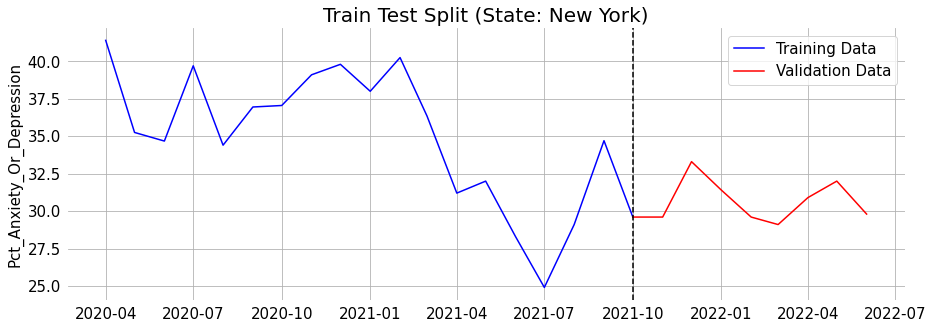

In [323]:
xgb_model.plot_data_distribution()

<h3><center>Step 4: Plot Feature Importances</center></h3>

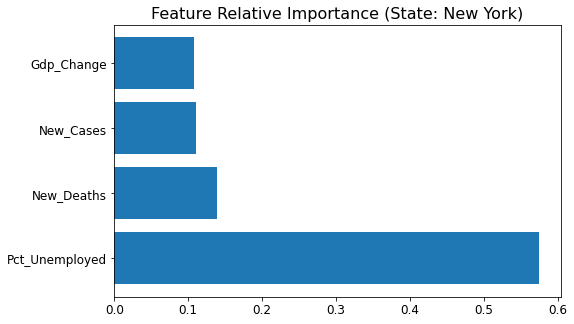

In [324]:
num_features = 4
xgb_model.plot_feature_importances(top = num_features)

<h3><center>Step 5: Plot Predictions</center></h3>

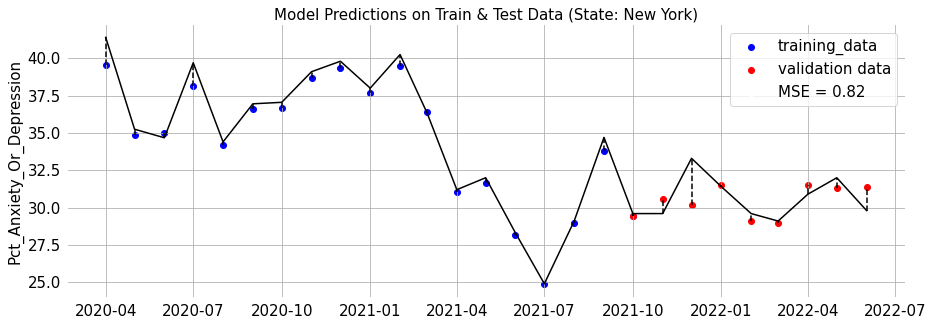

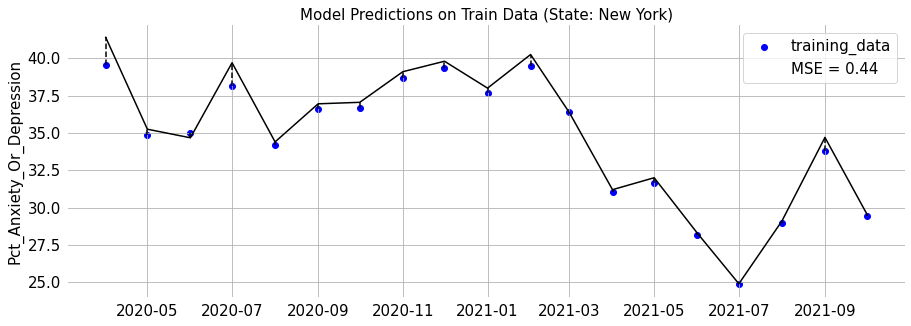

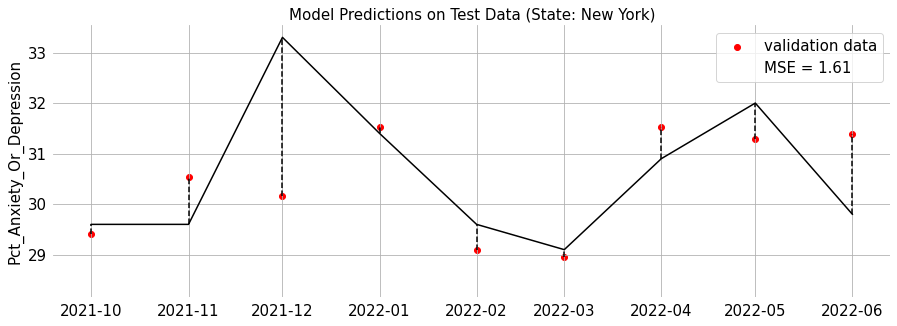

In [325]:
xgb_model.plot_predictions(train = True, test = True, error_line = True, mse = True)
xgb_model.plot_predictions(train = True, test = False, error_line = True, mse = True)
xgb_model.plot_predictions(train = False, test = True, error_line = True, mse = True)

#### Test Code
# xgb_model.plot_predictions(train = True, test = True, error_line = True, mse = True)
# xgb_model.plot_predictions(train = True, test = True, error_line = True, mse = False)
# xgb_model.plot_predictions(train = True, test = True, error_line = False, mse = True)
# xgb_model.plot_predictions(train = True, test = True, error_line = False, mse = False)
# xgb_model.plot_predictions(train = True, test = False, error_line = True, mse = True)
# xgb_model.plot_predictions(train = True, test = False, error_line = True, mse = False)
# xgb_model.plot_predictions(train = True, test = False, error_line = False, mse = True)
# xgb_model.plot_predictions(train = True, test = False, error_line = False, mse = False)
# xgb_model.plot_predictions(train = False, test = True, error_line = True, mse = True)
# xgb_model.plot_predictions(train = False, test = True, error_line = True, mse = False)
# xgb_model.plot_predictions(train = False, test = True, error_line = False, mse = True)
# xgb_model.plot_predictions(train = False, test = True, error_line = False, mse = False)
# xgb_model.plot_predictions(train = False, test = False, error_line = True, mse = True)
# xgb_model.plot_predictions(train = False, test = False, error_line = True, mse = False)
# xgb_model.plot_predictions(train = False, test = False, error_line = False, mse = True)
# xgb_model.plot_predictions(train = False, test = False, error_line = False, mse = False)

<h3><center>Step 6: Examine the Statiionarity of Data</center></h3>

In [326]:
xgb_model.print_adfuller_table()

Adfuller Statistics (State: New York)
test statistic: -3.3691
p-value: 0.0121


<h3><center>Step 7: Create Scatter Plots for the Most Important Features</center></h3>

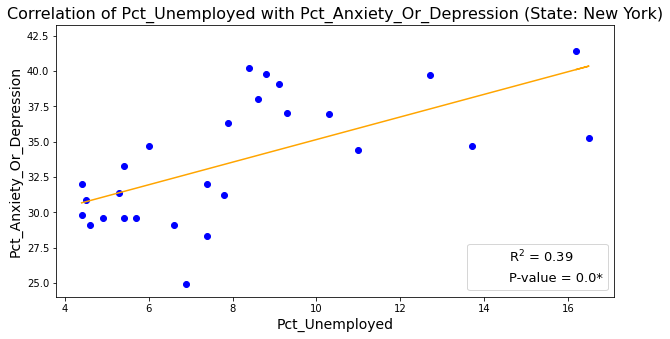

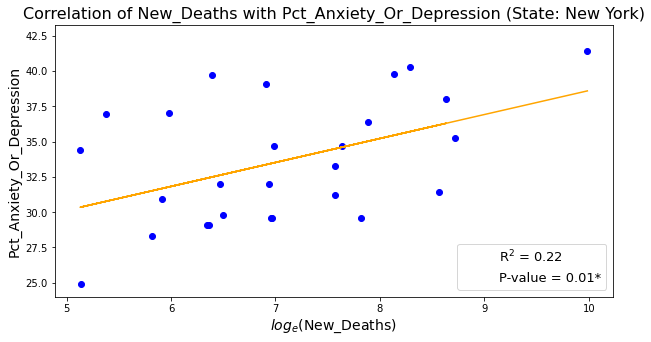

In [327]:
# select features
num_features = 2
feature_names = xgb_model.get_features(sorted = True).iloc[0:num_features, :].index

# certain x_variables need to be logged
log_vars = ["New_Deaths", "New_Cases"]
log_features = [True if name in log_vars else False for name in feature_names]

# plot
xgb_model.plot_features(features = feature_names, log = log_features, best_fit_line = True, corr = True)


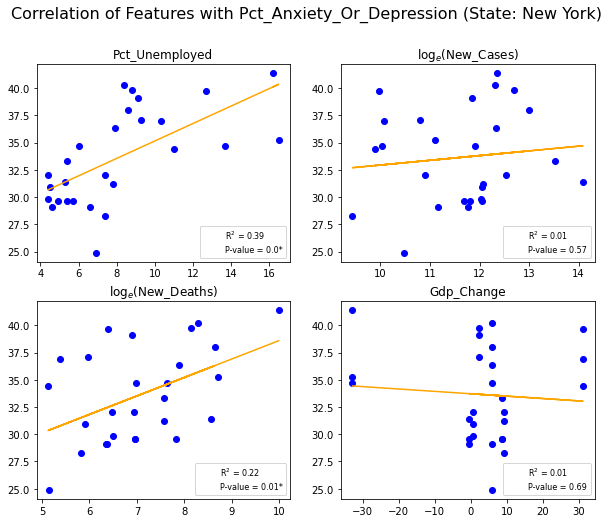

In [328]:
# select features
num_features_to_plot = 4
feature_names = xgb_model.get_features(sorted = True).iloc[0:num_features_to_plot, :].index

# certain x_variables need to be logged
log_vars = ["New_Deaths", "New_Cases"]
log_features = [True if name in log_vars else False for name in feature_names]

# plot
xgb_model.plot_features_unified(features = feature_names, best_fit_line = True, corr = True, log = log_features)

<h1><center>Post Analysis</center></h1>

<h3>1. How did the model perform in terms of prediction accuracy?</h3>

In [337]:
model = XGB(fulldata)
x_vars = ["New_Cases", "New_Deaths", "Pct_Infection", "Pct_Mortality", "Gdp_Change", "Income_Change", "Pct_Unemployed"]
y_var = "Pct_Anxiety_Or_Depression"
train_ratio = 0.7
num_estimators = 50
num_stopping_rounds = 10
rate = 0.1
verbosity = 100

all_states = fulldata.State.unique()
valid_states = []
mse_valid_states = []
mse_valid_states_test = []
mse_valid_states_train = []
importance_income = []
importance_unemployment = []
importance_num_deaths = []
importance_pct_deaths = []
importance_num_cases = []
importance_pct_cases = []

for state in all_states:
    try:
        model.fit(x_vars, y_var, state, train_ratio, num_estimators, num_stopping_rounds, rate, verbosity)
    except:
        continue
    mse = model.get_mse()
    mse_test = model.get_mse(test = True, train = False)
    mse_train = model.get_mse(test = False, train = True)
    importances = model.get_features()
    valid_states.append(state)
    mse_valid_states.append(mse)
    mse_valid_states_test.append(mse_test)
    mse_valid_states_train.append(mse_train)
    importance_income.append(importances.loc["Income_Change", "Importance"])
    importance_unemployment.append(importances.loc["Pct_Unemployed", "Importance"])
    importance_num_deaths.append(importances.loc["New_Deaths", "Importance"])
    importance_pct_deaths.append(importances.loc["Pct_Mortality", "Importance"])
    importance_num_cases.append(importances.loc["New_Cases", "Importance"])
    importance_pct_cases.append(importances.loc["Pct_Mortality", "Importance"])


# Split into training and testing data
mse_df = pd.DataFrame(data = {"State": valid_states, 
                          "Mean_Squared_Error": mse_valid_states,
                          "Mean_Squared_Error_Test": mse_valid_states_test,
                          "Mean_Squared_Error_Train": mse_valid_states_train})

# Split into high performance normal performance and low performance states
importances_df = pd.DataFrame(data = {"State": valid_states, 
                                    "Income_Importance_Score": importance_income,
                                    "Unemployment_Importance_Score": importance_unemployment,
                                    "Num_Deaths_Importance_Score": importance_num_deaths,
                                    "Pct_Deaths_Importance_Score": importance_pct_deaths,
                                    "Num_Cases_Importance_Score": importance_num_cases, 
                                    "Pct_Cases_Importance_Score": importance_pct_cases})


[0]	validation_0-rmse:32.51192	validation_1-rmse:29.40715
[49]	validation_0-rmse:0.69418	validation_1-rmse:2.45054
[0]	validation_0-rmse:32.82308	validation_1-rmse:28.36855
[39]	validation_0-rmse:1.25870	validation_1-rmse:3.04493
[0]	validation_0-rmse:34.10947	validation_1-rmse:32.37794
[49]	validation_0-rmse:0.81532	validation_1-rmse:3.19030
[0]	validation_0-rmse:34.26451	validation_1-rmse:28.18924
[39]	validation_0-rmse:1.21859	validation_1-rmse:2.44653
[0]	validation_0-rmse:32.03445	validation_1-rmse:26.78105
[35]	validation_0-rmse:1.75647	validation_1-rmse:3.11454
[0]	validation_0-rmse:30.89804	validation_1-rmse:25.92530
[49]	validation_0-rmse:0.63867	validation_1-rmse:1.95875
[0]	validation_0-rmse:29.34380	validation_1-rmse:23.80557
[38]	validation_0-rmse:1.43071	validation_1-rmse:2.62918
[0]	validation_0-rmse:32.77566	validation_1-rmse:27.94730
[37]	validation_0-rmse:1.58851	validation_1-rmse:3.92676
[0]	validation_0-rmse:32.67252	validation_1-rmse:27.23721
[49]	validation_0-rmse

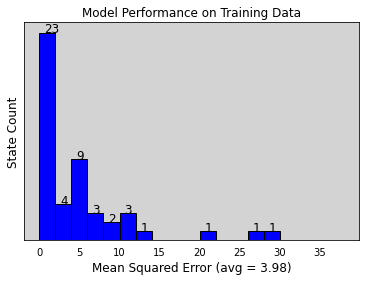

In [338]:
# Plot (Training Data) #
fig, ax = plt.subplots(figsize = (6, 4))
min_mse = int(mse_df["Mean_Squared_Error_Train"].min())
max_mse = int(mse_df["Mean_Squared_Error_Train"].max())
interval_length = int((max_mse - min_mse) / 15)
mse_df["Mean_Squared_Error_Train"].plot(kind = "hist", color = "blue", edgecolor = "black", density = True, bins = range(min_mse, max_mse, interval_length))


# Labels #
mean_value = round(mse_df["Mean_Squared_Error"].mean(), 2)
ax.set_xlabel(f"Mean Squared Error (avg = {mean_value})", size = 12)
ax.set_ylabel("State Count", size = 12)
ax.set_title("Model Performance on Training Data")
ax.set_yticks([])
ax.tick_params(left = False, bottom = False)
ax.set_facecolor('#D3D3D3')
ax.grid(visible = False)

temp = pd.DataFrame(mse_df["Mean_Squared_Error_Train"])
temp["Intervals"] = pd.cut(temp["Mean_Squared_Error_Train"], bins = range(min_mse, max_mse, interval_length))
temp = temp.groupby("Intervals").aggregate("count")

rectangles = ax.patches
lables = [label if label != 0 else None for label in temp["Mean_Squared_Error_Train"]]

for rectangle, label in zip(rectangles, lables):
    height = rectangle.get_height()
    x_coordinate = rectangle.get_x()
    width = rectangle.get_width()
    ax.text(
        x_coordinate + width / 2 - interval_length * 0.2, height + 0.0001, label, size = 12
    )
plt.show()

# Plot (Validation Data) #

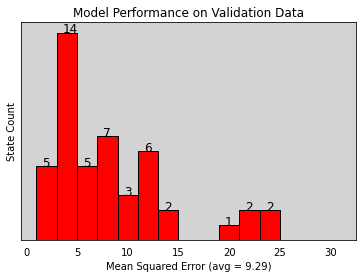

In [339]:
# Plot (Validation Data) #
fig, ax = plt.subplots(figsize = (6, 4))
min_mse = int(mse_df["Mean_Squared_Error_Test"].min())
max_mse = int(mse_df["Mean_Squared_Error_Test"].max())
interval_length = int((max_mse - min_mse) / 15)
mse_df["Mean_Squared_Error_Test"].plot(kind = "hist", color = "red", edgecolor = "black", density = True, bins = range(min_mse, max_mse, interval_length))


# Labels #
mean_value = round(mse_df["Mean_Squared_Error_Test"].mean(), 2)
ax.set_xlabel(f"Mean Squared Error (avg = {mean_value})")
ax.set_ylabel("State Count")
ax.set_title("Model Performance on Validation Data")
ax.set_yticks([])
ax.grid(visible = False)
ax.tick_params(left = False, bottom = False)
ax.set_facecolor('#D3D3D3')

temp = pd.DataFrame(mse_df["Mean_Squared_Error_Test"])
temp["Intervals"] = pd.cut(temp["Mean_Squared_Error_Test"], bins = range(min_mse, max_mse, interval_length))
temp = temp.groupby("Intervals").aggregate("count")

rectangles = ax.patches 
labels = [label if label != 0 else None for label in temp["Mean_Squared_Error_Test"]]

for rectangle, label in zip(rectangles, labels):
    height = rectangle.get_height()
    width = rectangle.get_width()
    x_coordinate = rectangle.get_x()
    ax.text(
        x_coordinate + width / 2 - interval_length * 0.2, height + 0.0001, label, size = 12
    )

plt.show()

<h3>2. What are the most important features in the model?</h3>

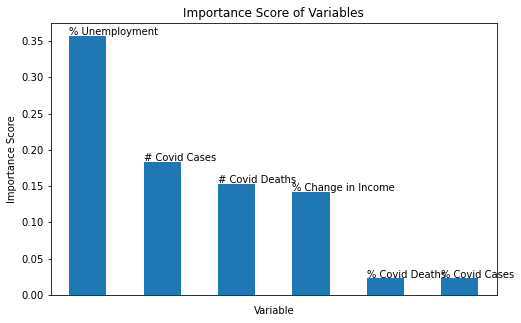

In [340]:
# Data #
avg_importances = pd.DataFrame({"Mean_Importance_Score": importances_df.iloc[:, 1:].apply(lambda column : np.mean(column))})
avg_importances = avg_importances.sort_values("Mean_Importance_Score", ascending = False)

# Plot #
fig, ax = plt.subplots(figsize = (8, 5))
avg_importances["Mean_Importance_Score"].plot(kind = 'bar')

# Labels #
ax.set_ylabel("Importance Score")
ax.set_xlabel("Variable")
ax.set_title("Importance Score of Variables")
ax.tick_params(bottom = False)
ax.set_xticklabels([])
ax.grid(visible = False)
rectangles = ax.patches
labels = ["% Unemployment", "# Covid Cases", "# Covid Deaths", "% Change in Income", "% Covid Deaths", "% Covid Cases"]

for rectangle, label in zip(rectangles, labels):
    height = rectangle.get_height()
    width = rectangle.get_width()
    x_coordinate = rectangle.get_x()
    ax.text(
        x_coordinate, height + 0.001, label
    )


<h3>3. What are some factors that influence model performance?</h3>

<h3>Learning Rate (i.e. the pace at which the model updates its parameters)</h3>

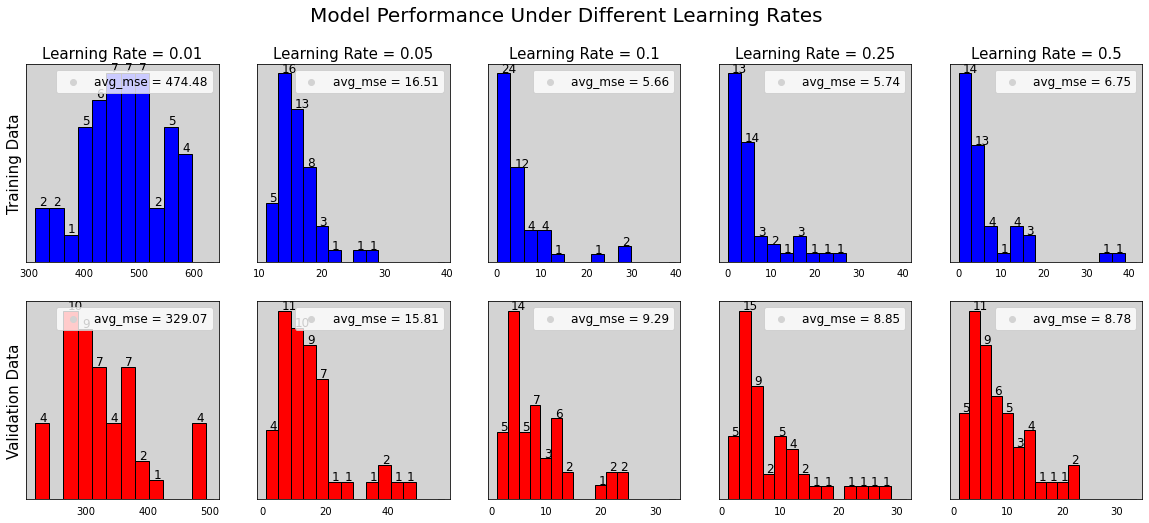

In [333]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (20, 8))
learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5]
fig.suptitle("Model Performance Under Different Learning Rates", size = 20)

col_idx = 0
for rate in learning_rates:
    model = XGB(fulldata)
    x_vars = ["New_Cases", "New_Deaths", "Pct_Infection", "Pct_Mortality", "Gdp_Change", "Income_Change", "Pct_Unemployed"]
    y_var = "Pct_Anxiety_Or_Depression"
    train_ratio = 0.7
    num_estimators = 50
    num_stopping_rounds = 10
    verbosity = 0

    all_states = fulldata.State.unique()
    valid_states = []
    mse_valid_states = []
    mse_valid_states_test = []
    mse_valid_states_train = []
    importance_income = []
    importance_unemployment = []
    importance_num_deaths = []
    importance_pct_deaths = []
    importance_num_cases = []
    importance_pct_cases = []

    for state in all_states:
        try:
            model.fit(x_vars, y_var, state, train_ratio, num_estimators, num_stopping_rounds, rate, verbosity)
        except:
            continue
        mse = model.get_mse()
        mse_test = model.get_mse(test = True, train = False)
        mse_train = model.get_mse(test = False, train = True)
        importances = model.get_features()
        valid_states.append(state)
        mse_valid_states.append(mse)
        mse_valid_states_test.append(mse_test)
        mse_valid_states_train.append(mse_train)
        importance_income.append(importances.loc["Income_Change", "Importance"])
        importance_unemployment.append(importances.loc["Pct_Unemployed", "Importance"])
        importance_num_deaths.append(importances.loc["New_Deaths", "Importance"])
        importance_pct_deaths.append(importances.loc["Pct_Mortality", "Importance"])
        importance_num_cases.append(importances.loc["New_Cases", "Importance"])
        importance_pct_cases.append(importances.loc["Pct_Mortality", "Importance"])


    # Split into training and testing data
    mse_df = pd.DataFrame(data = {"State": valid_states, 
                            "Mean_Squared_Error": mse_valid_states,
                            "Mean_Squared_Error_Test": mse_valid_states_test,
                            "Mean_Squared_Error_Train": mse_valid_states_train})
    train_min = int((mse_df["Mean_Squared_Error_Train"]).min())
    train_max = int((mse_df["Mean_Squared_Error_Train"]).max())
    train_interval_length = int((train_max - train_min) / 12)
    test_min = int((mse_df["Mean_Squared_Error_Test"]).min())
    test_max = int((mse_df["Mean_Squared_Error_Test"]).max())
    test_interval_length = int((test_max - test_min) / 12)
    mse_df["Train_Intervals"] = pd.cut(mse_df["Mean_Squared_Error_Train"], bins = range(train_min, train_max, train_interval_length))
    mse_df["Test_Intervals"] = pd.cut(mse_df["Mean_Squared_Error_Test"], bins = range(test_min, test_max, test_interval_length))

    # Split into high performance normal performance and low performance states
    importances_df = pd.DataFrame(data = {"State": valid_states, 
                                        "Income_Importance_Score": importance_income,
                                        "Unemployment_Importance_Score": importance_unemployment,
                                        "Num_Deaths_Importance_Score": importance_num_deaths,
                                        "Pct_Deaths_Importance_Score": importance_pct_deaths,
                                        "Num_Cases_Importance_Score": importance_num_cases, 
                                        "Pct_Cases_Importance_Score": importance_pct_cases})
    
    # plot (training data) #
    ax[0, col_idx].hist(mse_df["Mean_Squared_Error_Train"], color = "blue", edgecolor = "black", bins = range(train_min, train_max, train_interval_length))

    # text
    train_counts = mse_df.groupby("Train_Intervals").aggregate("count")
    rectangles = ax[0, col_idx].patches
    labels = [label if label != 0 else None for label in train_counts["State"]]

    for rectangle, label in zip(rectangles, labels):
        height = rectangle.get_height()
        width = rectangle.get_width()
        x_coordinate = rectangle.get_x()
        ax[0, col_idx].text(
            x_coordinate + width / 2 - train_interval_length * 0.2, height + 0.1, label, size = 12
        )

    # labels
    ax[0, col_idx].set_title(f'Learning Rate = {rate}', size = 15)
    ax[0, col_idx].set_yticks([])
    ax[0, col_idx].grid(visible = False)
    ax[0, col_idx].tick_params(left = False, bottom = False)
    ax[0, col_idx].set_facecolor('#D3D3D3')

    # legend
    train_mean = round(mse_df["Mean_Squared_Error_Train"].mean(), 2)
    plot = ax[0, col_idx].scatter(x = train_max, y = 0, color = '#D3D3D3')
    ax[0, col_idx].legend([plot], [f"avg_mse = {train_mean}"], loc = "upper right", prop = {"size": 12})

    # plot (validation data) #
    ax[1, col_idx].hist(mse_df["Mean_Squared_Error_Test"], color = "Red", edgecolor = "black", bins = range(test_min, test_max, test_interval_length))

    # text
    test_counts = mse_df.groupby("Test_Intervals").aggregate("count")
    rectangles = ax[1, col_idx].patches
    labels = [label if label != 0 else None for label in test_counts["State"]]

    for rectangle, label in zip(rectangles, labels):
        height = rectangle.get_height()
        width = rectangle.get_width()
        x_coordinate = rectangle.get_x()
        ax[1, col_idx].text(
            x_coordinate + width / 2 - test_interval_length * 0.2, height + 0.1, label, size = 12
        )

    # labels
    ax[1, col_idx].set_yticks([])
    ax[1, col_idx].grid(visible = False)
    ax[1, col_idx].tick_params(left = False, bottom = False)
    ax[1, col_idx].set_facecolor('#D3D3D3')
    
    # legend
    test_mean = round(mse_df["Mean_Squared_Error_Test"].mean(), 2)
    plot = ax[1, col_idx].scatter(x = test_max, y = 0, color = '#D3D3D3')
    ax[1, col_idx].legend([plot], [f"avg_mse = {test_mean}"], loc = "upper right", prop = {"size": 12})
    
    if (col_idx == 0):
        ax[0, col_idx].set_ylabel("Training Data", size = 15)
        ax[1, col_idx].set_ylabel("Validation Data", size = 15)

    col_idx += 1




<h3>Train-Test Ratio (i.e. how much data is used for training the model)</h3>

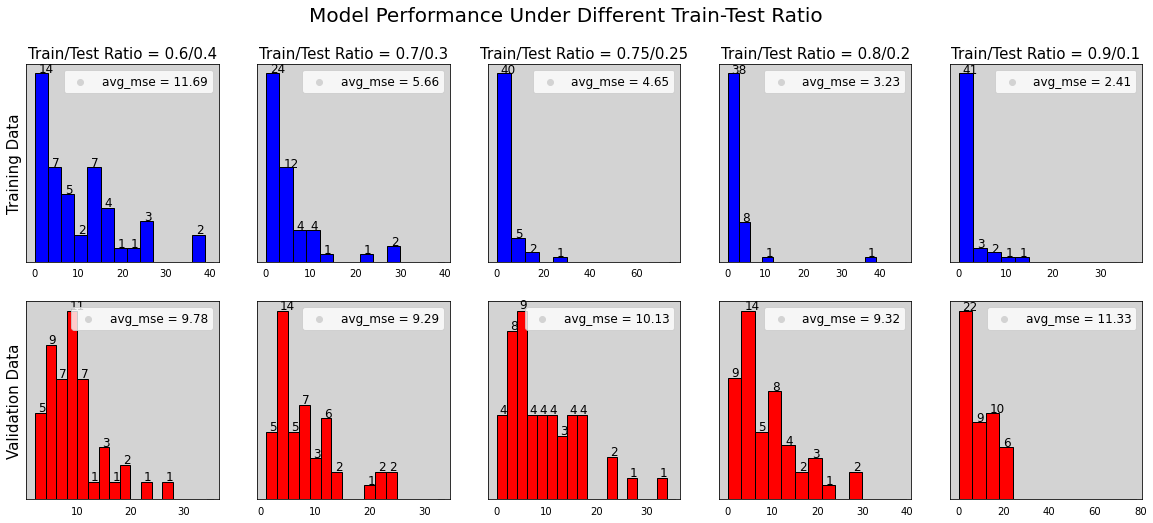

In [334]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (20, 8))
train_ratios = [0.6, 0.7, 0.75, 0.8, 0.9]
fig.suptitle("Model Performance Under Different Train-Test Ratio", size = 20)

col_idx = 0
for train_ratio in train_ratios:
    model = XGB(fulldata)
    x_vars = ["New_Cases", "New_Deaths", "Pct_Infection", "Pct_Mortality", "Gdp_Change", "Income_Change", "Pct_Unemployed"]
    y_var = "Pct_Anxiety_Or_Depression"
    rate = 0.1
    num_estimators = 50
    num_stopping_rounds = 10
    verbosity = 0

    all_states = fulldata.State.unique()
    valid_states = []
    mse_valid_states = []
    mse_valid_states_test = []
    mse_valid_states_train = []
    importance_income = []
    importance_unemployment = []
    importance_num_deaths = []
    importance_pct_deaths = []
    importance_num_cases = []
    importance_pct_cases = []

    for state in all_states:
        try:
            model.fit(x_vars, y_var, state, train_ratio, num_estimators, num_stopping_rounds, rate, verbosity)
        except:
            continue
        mse = model.get_mse()
        mse_test = model.get_mse(test = True, train = False)
        mse_train = model.get_mse(test = False, train = True)
        importances = model.get_features()
        valid_states.append(state)
        mse_valid_states.append(mse)
        mse_valid_states_test.append(mse_test)
        mse_valid_states_train.append(mse_train)
        importance_income.append(importances.loc["Income_Change", "Importance"])
        importance_unemployment.append(importances.loc["Pct_Unemployed", "Importance"])
        importance_num_deaths.append(importances.loc["New_Deaths", "Importance"])
        importance_pct_deaths.append(importances.loc["Pct_Mortality", "Importance"])
        importance_num_cases.append(importances.loc["New_Cases", "Importance"])
        importance_pct_cases.append(importances.loc["Pct_Mortality", "Importance"])


    # Split into training and testing data
    mse_df = pd.DataFrame(data = {"State": valid_states, 
                            "Mean_Squared_Error": mse_valid_states,
                            "Mean_Squared_Error_Test": mse_valid_states_test,
                            "Mean_Squared_Error_Train": mse_valid_states_train})
    train_min = int((mse_df["Mean_Squared_Error_Train"]).min())
    train_max = int((mse_df["Mean_Squared_Error_Train"]).max())
    train_interval_length = int((train_max - train_min) / 12)
    test_min = int((mse_df["Mean_Squared_Error_Test"]).min())
    test_max = int((mse_df["Mean_Squared_Error_Test"]).max())
    test_interval_length = int((test_max - test_min) / 12)
    mse_df["Train_Intervals"] = pd.cut(mse_df["Mean_Squared_Error_Train"], bins = range(train_min, train_max, train_interval_length))
    mse_df["Test_Intervals"] = pd.cut(mse_df["Mean_Squared_Error_Test"], bins = range(test_min, test_max, test_interval_length))

    # Split into high performance normal performance and low performance states
    importances_df = pd.DataFrame(data = {"State": valid_states, 
                                        "Income_Importance_Score": importance_income,
                                        "Unemployment_Importance_Score": importance_unemployment,
                                        "Num_Deaths_Importance_Score": importance_num_deaths,
                                        "Pct_Deaths_Importance_Score": importance_pct_deaths,
                                        "Num_Cases_Importance_Score": importance_num_cases, 
                                        "Pct_Cases_Importance_Score": importance_pct_cases})
    
    # plot (training data) #
    ax[0, col_idx].hist(mse_df["Mean_Squared_Error_Train"], color = "blue", edgecolor = "black", bins = range(train_min, train_max, train_interval_length))

    # text
    train_counts = mse_df.groupby("Train_Intervals").aggregate("count")
    rectangles = ax[0, col_idx].patches
    labels = [label if label != 0 else None for label in train_counts["State"]]

    for rectangle, label in zip(rectangles, labels):
        height = rectangle.get_height()
        width = rectangle.get_width()
        x_coordinate = rectangle.get_x()
        ax[0, col_idx].text(
            x_coordinate + width / 2 - train_interval_length * 0.2, height + 0.1, label, size = 12
        )

    # labels
    ax[0, col_idx].set_title(f'Train/Test Ratio = {round(train_ratio, 2)}/{round(1 - train_ratio,2)}', size = 15)
    ax[0, col_idx].set_yticks([])
    ax[0, col_idx].grid(visible = False)
    ax[0, col_idx].tick_params(left = False, bottom = False)
    ax[0, col_idx].set_facecolor('#D3D3D3')

    # legend
    train_mean = round(mse_df["Mean_Squared_Error_Train"].mean(), 2)
    plot = ax[0, col_idx].scatter(x = train_max, y = 0, color = '#D3D3D3')
    ax[0, col_idx].legend([plot], [f"avg_mse = {train_mean}"], loc = "upper right", prop = {"size": 12})

    # plot (validation data) #
    ax[1, col_idx].hist(mse_df["Mean_Squared_Error_Test"], color = "Red", edgecolor = "black", bins = range(test_min, test_max, test_interval_length))

    # text
    test_counts = mse_df.groupby("Test_Intervals").aggregate("count")
    rectangles = ax[1, col_idx].patches
    labels = [label if label != 0 else None for label in test_counts["State"]]

    for rectangle, label in zip(rectangles, labels):
        height = rectangle.get_height()
        width = rectangle.get_width()
        x_coordinate = rectangle.get_x()
        ax[1, col_idx].text(
            x_coordinate + width / 2 - test_interval_length * 0.2, height + 0.1, label, size = 12
        )

    # labels
    ax[1, col_idx].set_yticks([])
    ax[1, col_idx].grid(visible = False)
    ax[1, col_idx].tick_params(left = False, bottom = False)
    ax[1, col_idx].set_facecolor('#D3D3D3')
    
    # legend
    test_mean = round(mse_df["Mean_Squared_Error_Test"].mean(), 2)
    plot = ax[1, col_idx].scatter(x = test_max, y = 0, color = '#D3D3D3')
    ax[1, col_idx].legend([plot], [f"avg_mse = {test_mean}"], loc = "upper right", prop = {"size": 12})
    
    if (col_idx == 0):
        ax[0, col_idx].set_ylabel("Training Data", size = 15)
        ax[1, col_idx].set_ylabel("Validation Data", size = 15)

    col_idx += 1




<h3>Stationarity of Data (i.e. whether the mean and variance of data change over time)</h3>

In [335]:
# divide states into stationary and nonstationary states
stationary_states = []
nonstationary_states = []

for state in fulldata["State"].unique():
    temp_data = fulldata[fulldata["State"] == state]
    adfuller_pvalue = round(adfuller(temp_data["Pct_Anxiety_Or_Depression"])[1], 2)
    is_stationary = adfuller_pvalue > 0.1
    if (is_stationary):
        stationary_states.append(state)
    else:
        nonstationary_states.append(state)

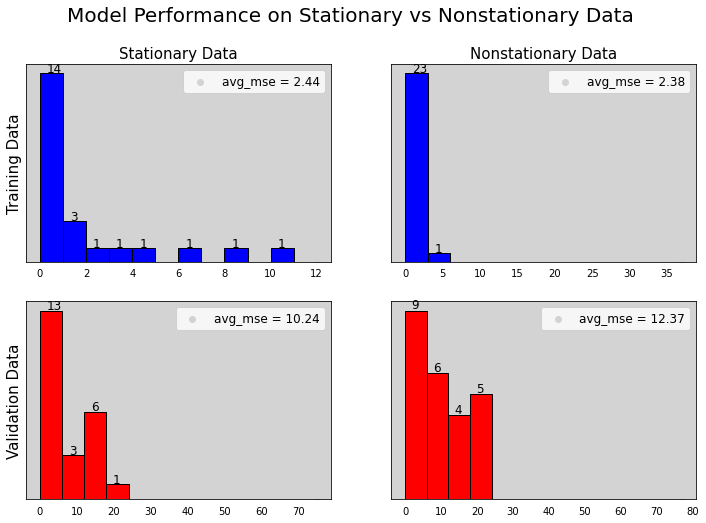

In [336]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
state_groups = [stationary_states, nonstationary_states]
fig.suptitle("Model Performance on Stationary vs Nonstationary Data", size = 20)


col_idx = 0
for states in state_groups:
    model = XGB(fulldata)
    x_vars = ["New_Cases", "New_Deaths", "Pct_Infection", "Pct_Mortality", "Gdp_Change", "Income_Change", "Pct_Unemployed"]
    y_var = "Pct_Anxiety_Or_Depression"
    rate = 0.1
    num_estimators = 50
    num_stopping_rounds = 10
    verbosity = 0

    valid_states = []
    mse_valid_states = []
    mse_valid_states_test = []
    mse_valid_states_train = []
    importance_income = []
    importance_unemployment = []
    importance_num_deaths = []
    importance_pct_deaths = []
    importance_num_cases = []
    importance_pct_cases = []

    for state in states:
        try:
            model.fit(x_vars, y_var, state, train_ratio, num_estimators, num_stopping_rounds, rate, verbosity)
        except:
            continue
        mse = model.get_mse()
        mse_test = model.get_mse(test = True, train = False)
        mse_train = model.get_mse(test = False, train = True)
        importances = model.get_features()
        valid_states.append(state)
        mse_valid_states.append(mse)
        mse_valid_states_test.append(mse_test)
        mse_valid_states_train.append(mse_train)
        importance_income.append(importances.loc["Income_Change", "Importance"])
        importance_unemployment.append(importances.loc["Pct_Unemployed", "Importance"])
        importance_num_deaths.append(importances.loc["New_Deaths", "Importance"])
        importance_pct_deaths.append(importances.loc["Pct_Mortality", "Importance"])
        importance_num_cases.append(importances.loc["New_Cases", "Importance"])
        importance_pct_cases.append(importances.loc["Pct_Mortality", "Importance"])


    # Split into training and testing data
    mse_df = pd.DataFrame(data = {"State": valid_states, 
                            "Mean_Squared_Error": mse_valid_states,
                            "Mean_Squared_Error_Test": mse_valid_states_test,
                            "Mean_Squared_Error_Train": mse_valid_states_train})
    train_min = int((mse_df["Mean_Squared_Error_Train"]).min())
    train_max = int((mse_df["Mean_Squared_Error_Train"]).max())
    train_interval_length = int((train_max - train_min) / 12)
    test_min = int((mse_df["Mean_Squared_Error_Test"]).min())
    test_max = int((mse_df["Mean_Squared_Error_Test"]).max())
    test_interval_length = int((test_max - test_min) / 12)
    mse_df["Train_Intervals"] = pd.cut(mse_df["Mean_Squared_Error_Train"], bins = range(train_min, train_max, train_interval_length))
    mse_df["Test_Intervals"] = pd.cut(mse_df["Mean_Squared_Error_Test"], bins = range(test_min, test_max, test_interval_length))

    # Split into high performance normal performance and low performance states
    importances_df = pd.DataFrame(data = {"State": valid_states, 
                                        "Income_Importance_Score": importance_income,
                                        "Unemployment_Importance_Score": importance_unemployment,
                                        "Num_Deaths_Importance_Score": importance_num_deaths,
                                        "Pct_Deaths_Importance_Score": importance_pct_deaths,
                                        "Num_Cases_Importance_Score": importance_num_cases, 
                                        "Pct_Cases_Importance_Score": importance_pct_cases})
    
    # plot (training data) #
    ax[0, col_idx].hist(mse_df["Mean_Squared_Error_Train"], color = "blue", edgecolor = "black", bins = range(train_min, train_max, train_interval_length))

    # text
    train_counts = mse_df.groupby("Train_Intervals").aggregate("count")
    rectangles = ax[0, col_idx].patches
    labels = [label if label != 0 else None for label in train_counts["State"]]

    for rectangle, label in zip(rectangles, labels):
        height = rectangle.get_height()
        width = rectangle.get_width()
        x_coordinate = rectangle.get_x()
        ax[0, col_idx].text(
            x_coordinate + width / 2 - train_interval_length * 0.2, height + 0.1, label, size = 12
        )

    # labels
    ax[0, col_idx].set_yticks([])
    ax[0, col_idx].grid(visible = False)
    ax[0, col_idx].tick_params(left = False, bottom = False)
    ax[0, col_idx].set_facecolor('#D3D3D3')

    # legend
    train_mean = round(mse_df["Mean_Squared_Error_Train"].mean(), 2)
    plot = ax[0, col_idx].scatter(x = train_max, y = 0, color = '#D3D3D3')
    ax[0, col_idx].legend([plot], [f"avg_mse = {train_mean}"], loc = "upper right", prop = {"size": 12})

    # plot (validation data) #
    ax[1, col_idx].hist(mse_df["Mean_Squared_Error_Test"], color = "Red", edgecolor = "black", bins = range(test_min, test_max, test_interval_length))

    # text
    test_counts = mse_df.groupby("Test_Intervals").aggregate("count")
    rectangles = ax[1, col_idx].patches
    labels = [label if label != 0 else None for label in test_counts["State"]]

    for rectangle, label in zip(rectangles, labels):
        height = rectangle.get_height()
        width = rectangle.get_width()
        x_coordinate = rectangle.get_x()
        ax[1, col_idx].text(
            x_coordinate + width / 2 - test_interval_length * 0.2, height + 0.1, label, size = 12
        )

    # labels
    ax[1, col_idx].set_yticks([])
    ax[1, col_idx].grid(visible = False)
    ax[1, col_idx].tick_params(left = False, bottom = False)
    ax[1, col_idx].set_facecolor('#D3D3D3')
    
    # legend
    test_mean = round(mse_df["Mean_Squared_Error_Test"].mean(), 2)
    plot = ax[1, col_idx].scatter(x = test_max, y = 0, color = '#D3D3D3')
    ax[1, col_idx].legend([plot], [f"avg_mse = {test_mean}"], loc = "upper right", prop = {"size": 12})
    
    if (col_idx == 0):
        ax[0, col_idx].set_ylabel("Training Data", size = 15)
        ax[1, col_idx].set_ylabel("Validation Data", size = 15)
        ax[0, col_idx].set_title("Stationary Data", size = 15)
    else:
        ax[0, col_idx].set_title("Nonstationary Data", size = 15)
    

    col_idx += 1


